In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle
import numpy as np

In [6]:
response = requests.get('http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_i_reportModel=133685247')
response.status_code

200

In [7]:
response.content

b'<html><head><META http-equiv="Content-Type" content="text/html; charset=iso-8859-1"><div></div><title></title><script type="text/javascript" src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr"></script><link rel="stylesheet" type="text/css" href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style"><link rel="stylesheet" type="text/css" href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator"></head><body bgcolor="#ffffff" marginheight="0" marginwidth="5" link="#666666" vlink="#666666" alink="#666666"><div class="filtres"><form method="GET" name="f" action="!GEDPUBLICREPORTS.filter"><input type="hidden" name="ww_b_list" value="1"><input type="hidden" name="ww_i_reportmodel" value="133685247"><input type="hidden" name="ww_c_langue" value=""><h1 id="titre">Liste des \xe9tudiants inscrits par semestre</h1><table border="0" id="format"><tr><th>Format:</th></tr><tr><td><input type="radio" name="ww_i_reportModelXsl" value="133685270" checked>html</td

In [8]:
soup = BeautifulSoup(response.text,'html.parser')
print(soup.prettify())

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <div>
   </div>
   <title>
   </title>
   <script src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr" type="text/javascript">
   </script>
   <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style" rel="stylesheet" type="text/css">
    <link href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator" rel="stylesheet" type="text/css"/>
   </link>
  </meta>
 </head>
 <body alink="#666666" bgcolor="#ffffff" link="#666666" marginheight="0" marginwidth="5" vlink="#666666">
  <div class="filtres">
   <form action="!GEDPUBLICREPORTS.filter" method="GET" name="f">
    <input name="ww_b_list" type="hidden" value="1">
     <input name="ww_i_reportmodel" type="hidden" value="133685247">
      <input name="ww_c_langue" type="hidden" value="">
       <h1 id="titre">
        Liste des étudiants inscrits par semestre
       </h1>
       <table border="0" id="format">
 

In [9]:
dept_node = soup.find_all('select', attrs={'name': 'ww_x_UNITE_ACAD'})
dept = {}
if dept_node:
    for option in dept_node[0].findAll('option'):
        if option.get('value') != 'null':
            print ('value:{} text:{}'.format(option.get('value'),option.get_text()))
            dept[option.get_text()] = option.get('value')
dept

value:942293 text:Architecture
value:246696 text:Chimie et génie chimique
value:943282 text:Cours de mathématiques spéciales
value:637841336 text:EME (EPFL Middle East)
value:942623 text:Génie civil
value:944263 text:Génie mécanique
value:943936 text:Génie électrique et électronique 
value:2054839157 text:Humanités digitales
value:249847 text:Informatique
value:120623110 text:Ingénierie financière
value:946882 text:Management de la technologie
value:944590 text:Mathématiques
value:945244 text:Microtechnique
value:945571 text:Physique
value:944917 text:Science et génie des matériaux
value:942953 text:Sciences et ingénierie de l'environnement
value:945901 text:Sciences et technologies du vivant
value:1574548993 text:Section FCUE
value:946228 text:Systèmes de communication


{'Architecture': '942293',
 'Chimie et génie chimique': '246696',
 'Cours de mathématiques spéciales': '943282',
 'EME (EPFL Middle East)': '637841336',
 'Génie civil': '942623',
 'Génie mécanique': '944263',
 'Génie électrique et électronique ': '943936',
 'Humanités digitales': '2054839157',
 'Informatique': '249847',
 'Ingénierie financière': '120623110',
 'Management de la technologie': '946882',
 'Mathématiques': '944590',
 'Microtechnique': '945244',
 'Physique': '945571',
 'Science et génie des matériaux': '944917',
 "Sciences et ingénierie de l'environnement": '942953',
 'Sciences et technologies du vivant': '945901',
 'Section FCUE': '1574548993',
 'Systèmes de communication': '946228'}

In [10]:
year_node = soup.find_all('select', attrs={'name': 'ww_x_PERIODE_ACAD'})
year = {}
if year_node:
    for option in year_node[0].findAll('option'):
        if option.get('value') != 'null':
            print ('value:{} text:{}'.format(option.get('value'),option.get_text()))
            year[option.get_text()] = option.get('value')
year

value:355925344 text:2016-2017
value:213638028 text:2015-2016
value:213637922 text:2014-2015
value:213637754 text:2013-2014
value:123456101 text:2012-2013
value:123455150 text:2011-2012
value:39486325 text:2010-2011
value:978195 text:2009-2010
value:978187 text:2008-2009
value:978181 text:2007-2008


{'2007-2008': '978181',
 '2008-2009': '978187',
 '2009-2010': '978195',
 '2010-2011': '39486325',
 '2011-2012': '123455150',
 '2012-2013': '123456101',
 '2013-2014': '213637754',
 '2014-2015': '213637922',
 '2015-2016': '213638028',
 '2016-2017': '355925344'}

In [11]:
semester_node = soup.find_all('select', attrs={'name': 'ww_x_PERIODE_PEDAGO'})
semester = {}
if semester_node:
    for option in semester_node[0].findAll('option'):
        if option.get('value') != 'null':
            print ('value:{} text:{}'.format(option.get('value'),option.get_text()))
            semester[option.get_text()] = option.get('value')
        

value:249108 text:Bachelor semestre 1
value:249114 text:Bachelor semestre 2
value:942155 text:Bachelor semestre 3
value:942163 text:Bachelor semestre 4
value:942120 text:Bachelor semestre 5
value:2226768 text:Bachelor semestre 5b
value:942175 text:Bachelor semestre 6
value:2226785 text:Bachelor semestre 6b
value:2230106 text:Master semestre 1
value:942192 text:Master semestre 2
value:2230128 text:Master semestre 3
value:2230140 text:Master semestre 4
value:2335667 text:Mineur semestre 1
value:2335676 text:Mineur semestre 2
value:2063602308 text:Mise à niveau
value:249127 text:Projet Master automne
value:3781783 text:Projet Master printemps
value:953159 text:Semestre automne
value:2754553 text:Semestre printemps
value:953137 text:Stage automne 3ème année
value:2226616 text:Stage automne 4ème année
value:983606 text:Stage printemps 3ème année
value:2226626 text:Stage printemps 4ème année
value:2227132 text:Stage printemps master


In [12]:
def get_student_list(section,acadyear,sem):
    base_url_to_load_table = 'http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.bhtml?ww_x_GPS=-1&' +\
    'ww_i_reportModel=133685247&ww_i_reportModelXsl=133685270'
    param_dept = '&ww_x_UNITE_ACAD=%s' % dept[section]
    param_year = '&ww_x_PERIODE_ACAD=%s'% year[acadyear]
    param_semester = '&ww_x_PERIODE_PEDAGO=%s'% semester[sem]
    end_url = '&ww_x_HIVERETE=null'

    final_url = base_url_to_load_table + param_dept + param_year + param_semester + end_url

    response = requests.get(final_url)
    print('Response Code:{}'.format(response.status_code))

    soup1 = BeautifulSoup(response.text,'html.parser')
    #print(soup.prettify())
    return soup1

In [13]:
def make_dataframe(soup1):
    rows = soup1.find_all('tr')
    data = []
    h = []
    for row in rows:
        header = row.find_all('th')
        header = [ele.text.strip() for ele in header]
        h.append([ele for ele in header] )
    h[1].append('Remarks')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols ]) 
    df = pd.DataFrame(data[2:],columns = h[1] )
    print('Dataframe Created of Size:{}'.format(df.shape))
    return df

In [14]:
sem_keys = list(semester.keys())
sem_keys.sort()
year_keys = list(year.keys())
year_keys.sort()
year_keys

['2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017']

In [99]:
bachelor_sem6_data = []
bachelor_sem1_data = []

ind = list(range(0,len(year_keys)-2))
acadyear = [year_keys[indx] for indx in ind]
for acadyear_ in acadyear:
    print (acadyear_, sem_keys[0])
    soup1 = get_student_list('Informatique',acadyear_,sem_keys[0])
    bachelor_sem1_data.append(make_dataframe(soup1))
    

ind = list(range(2,len(year_keys)))
acadyear = [year_keys[indx] for indx in ind]
for acadyear_ in acadyear:
    print (acadyear_, sem_keys[6])
    soup1 = get_student_list('Informatique',acadyear_,sem_keys[6])
    bachelor_sem6_data.append(make_dataframe(soup1))

2007-2008 Bachelor semestre 1


KeyboardInterrupt: 

In [12]:

with open('dataframe_bachelor_sem1.pickle', 'wb') as handle:
    pickle.dump(bachelor_sem1_data, handle)
    
with open('dataframe_bachelor_sem6.pickle', 'wb') as handle:
    pickle.dump(bachelor_sem6_data, handle)

In [3]:
with open('dataframe_bachelor_sem1.pickle', 'rb') as handle:
    bachelor_sem1_data = pickle.load(handle)
print(len(bachelor_sem1_data))
with open('dataframe_bachelor_sem6.pickle', 'rb') as handle:
    bachelor_sem6_data = pickle.load(handle)
print(len(bachelor_sem6_data))

8
8


In [4]:
def drop_columns(df):
    for dataframe in df:
        for col in dataframe.columns:
            if col not in ['Civilité','Nom Prénom','No Sciper']:
                dataframe.drop(col,1,inplace=True)
        dataframe.set_index('No Sciper',inplace=True)
        print (dataframe.index.is_unique)
        print (dataframe.head(10))

drop_columns(bachelor_sem1_data)
drop_columns(bachelor_sem6_data)



True
           Civilité             Nom Prénom
No Sciper                                 
169569     Monsieur      Arévalo Christian
174905     Monsieur        Aubelle Flavien
173922     Monsieur          Badoud Morgan
179406     Monsieur     Baeriswyl Jonathan
179428     Monsieur        Barroco Michael
179324     Monsieur         Belfis Nicolas
174597     Monsieur      Beliaev Stanislav
179449     Monsieur  Bindschaedler Vincent
178553     Monsieur     Bloch Marc-Olivier
179426     Monsieur             Bloch Remi
True
           Civilité               Nom Prénom
No Sciper                                   
184228     Monsieur          Ahluwalia Samit
179383     Monsieur               Amiet Nils
186836     Monsieur    Andenmatten Alexandre
184772     Monsieur            Arnfred Jonas
187235     Monsieur  Badila Constantin-Tudor
186264     Monsieur           Bougacha Malik
185949     Monsieur         Bourgeois Jérémy
184264     Monsieur             Bourqui Marc
186825     Monsieur     

In [15]:
final = []
for indx_sem1 in range(0,len(bachelor_sem1_data)):
    dummy = bachelor_sem1_data[indx_sem1].copy(deep=True)
    for indx_sem6 in range(indx_sem1,len(bachelor_sem6_data)):
        dummy[year_keys[indx_sem6+2]] = pd.Series(bachelor_sem1_data[indx_sem1].index.isin(bachelor_sem6_data[indx_sem6].index),index=dummy.index)
    final.append(dummy)

final[2]

,Civilité,Nom Prénom,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017
No Sciper,,,,,,,,
194197,Monsieur,Abdallah Jad,False,False,False,False,False,False
195766,Madame,Al Azawi Marwa,False,False,False,False,False,False
186942,Monsieur,Amrani Ismaïl,False,False,False,False,False,False
194182,Monsieur,Antognini Marco,False,True,False,False,False,False
186595,Monsieur,Augsburger Damien,True,False,False,False,False,False
192757,Madame,Balmau Oana Maria,True,False,False,False,False,False
189517,Monsieur,Barben Loïc,True,False,False,False,False,False
192248,Monsieur,Barbier Issa,False,False,False,False,False,False
187143,Monsieur,Bennani Kabchi Reda,False,False,False,False,False,False


In [16]:
def month_cal(row):
    for ind in range(len(row)-1,1,-1):
        if row[ind] == True:
            return 12*(ind+1)

for df in final:
    df['Months till Sem6'] = df.apply(month_cal,axis=1)
    df.drop(df.columns[2:len(df.columns)-1],1,inplace=True)


In [17]:
final[0].head()

,Civilité,Nom Prénom,Months till Sem6
No Sciper,,,
169569,Monsieur,Arévalo Christian,36.0
174905,Monsieur,Aubelle Flavien,60.0
173922,Monsieur,Badoud Morgan,NaN
179406,Monsieur,Baeriswyl Jonathan,48.0
179428,Monsieur,Barroco Michael,48.0


In [18]:
result = pd.concat(final)
result.head()
result.shape

(1268, 3)

In [19]:
result.dropna(axis=0,inplace=True)


In [20]:
result.groupby('Civilité').describe()


Months till Sem6
Civilité                        
Madame   count         32.000000
         mean          39.750000
         std            6.420733
         min           36.000000
         25%           36.000000
         50%           36.000000
         75%           48.000000
         max           60.000000
Monsieur count        431.000000
         mean          42.097448
         std            8.922392
         min           36.000000
         25%           36.000000
         50%           36.000000
         75%           48.000000
         max           84.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11850e780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1185ae668>], dtype=object)

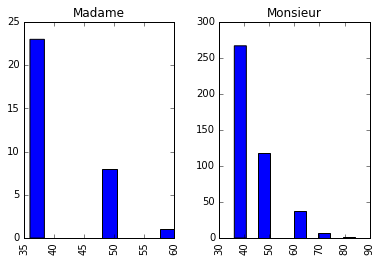

In [84]:
result['Months till Sem6'].hist(by=result['Civilité'])


In [86]:
x = result[result['Civilité']=='Monsieur']['Months till Sem6']
y = result[result['Civilité']=='Madame']['Months till Sem6']

stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=6082.5, pvalue=0.096821708037428067)

In [12]:


sem_num = [ 8, 9, 10, 11, 12, 13, 15,16] #Maps to [1,2,3,4,Minor1,Minor2,Project Fall,Project Spring]

master_data = pd.DataFrame()

ind = list(range(0,len(year_keys)))
acadyear = [year_keys[indx] for indx in ind]

for year_idx, acadyear_ in enumerate(acadyear):                            # Loop through all years
    
    for sem_idx, sem in enumerate(sem_num):                          # Loop through all semesters
        
        if (not ((acadyear_== '2007-2008' and sem>8) or (acadyear_== '2008-2009' and sem>9) or (acadyear_== '2016-2017' and sem==8))):
            print(acadyear_)
            print(sem_keys[sem])
           
           
            soup1 =  get_student_list('Informatique',acadyear_,sem_keys[sem])
            


            sex = [s.text for s in soup1.find_all('td')[0::12]]
            #names = [n.text for n in soup.find_all('td')[1::12]]
            #name = [re.sub('\xa0', '', n) for n in names]
            sciper = [s.text for s in soup1.find_all('td')[10::12]]
            special = [s.text for s in soup1.find_all('td')[4::12]]
            minor = [s.text for s in soup1.find_all('td')[6::12]]
            y = [acadyear_]*len(sciper)
            s = [sem_keys[sem]]*len(sciper)
            master_data = master_data.append(pd.DataFrame({'sciper':sciper,'sex':sex,'specail':special,'minor':minor, 'start_year':y,'semester':s}))
        
with open('master_data','wb') as handle:
    pickle.dump(master_data,handle)

2007-2008
Master semestre 1
Response Code:200
2008-2009
Master semestre 1
Response Code:200
2008-2009
Master semestre 2
Response Code:200
2009-2010
Master semestre 1
Response Code:200
2009-2010
Master semestre 2
Response Code:200
2009-2010
Master semestre 3
Response Code:200
2009-2010
Master semestre 4
Response Code:200
2009-2010
Mineur semestre 1
Response Code:200
2009-2010
Mineur semestre 2
Response Code:200
2009-2010
Projet Master automne
Response Code:200
2009-2010
Projet Master printemps
Response Code:200
2010-2011
Master semestre 1
Response Code:200
2010-2011
Master semestre 2
Response Code:200
2010-2011
Master semestre 3
Response Code:200
2010-2011
Master semestre 4
Response Code:200
2010-2011
Mineur semestre 1
Response Code:200
2010-2011
Mineur semestre 2
Response Code:200
2010-2011
Projet Master automne
Response Code:200
2010-2011
Projet Master printemps
Response Code:200
2011-2012
Master semestre 1
Response Code:200
2011-2012
Master semestre 2
Response Code:200
2011-2012
Mast

In [24]:
with open('master_data','rb') as handle:
    master_data = pickle.load(handle)
master_data

,minor,sciper,semester,sex,specail,start_year
0,,153066,Master semestre 1,Monsieur,,2007-2008
1,,180027,Master semestre 1,Madame,,2007-2008
2,,152232,Master semestre 1,Monsieur,,2007-2008
3,,177395,Master semestre 1,Monsieur,,2007-2008
4,,161970,Master semestre 1,Monsieur,,2007-2008
5,,166258,Master semestre 1,Monsieur,,2007-2008
6,,173600,Master semestre 1,Monsieur,,2007-2008
7,,178879,Master semestre 1,Monsieur,,2007-2008
8,,154573,Master semestre 1,Madame,,2007-2008
9,,160492,Master semestre 1,Monsieur,,2007-2008


In [25]:
master_data.index = master_data['sciper']

drop_data = master_data['semester'].groupby(master_data['sciper']).filter(lambda x: 
        len(x) == 1 or (sum(x.isin(['Master semestre 1','Master semestre 2']))<2))
print(drop_data.count())
master_data.drop(drop_data.index,axis=0,inplace=True)

add_year_data = master_data[['minor','semester']].groupby(master_data['sciper']).filter(lambda x: (x['minor']!= '').all() and 
                            (sum(x['semester'].isin(['Master semestre 3'])) == 0))


for ind in add_year_data.index.unique():
    new_row = master_data.loc[ind].iloc[0].copy()
    new_row.semester = 'Master semestre 3'
    new_row.start_year = ''
    master_data.loc[master_data.shape[0]] = new_row
    
master_data.index = master_data['sciper']



98


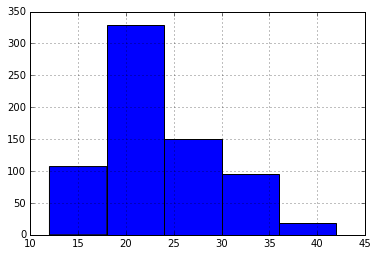

In [70]:
master_data['sciper'].groupby(master_data['sciper']).apply(lambda x: x.count()*6).hist(bins=[ 12, 18, 24, 30, 36, 42])

In [79]:
duration_months = pd.DataFrame({'average_stay': master_data['sciper'].groupby(master_data['sciper']).apply(lambda x: x.count()*6)})
average_stay_all = np.round(np.mean(duration_months['average_stay']),decimals=2)
average_stay_all

20.52

In [80]:
master_data_unique = master_data.sort_values(['sciper','semester'])[['sciper','sex']].drop_duplicates()
master_data_unique = master_data_unique.set_index('sciper')
master_data_duration = pd.concat([master_data_unique, duration_months], axis=1)
master_data_duration.head()

,sex,average_stay
sciper,,
146742,Monsieur,42
147008,Monsieur,24
153066,Monsieur,24
153746,Monsieur,12
153762,Monsieur,24


In [104]:
master_data_special = master_data[master_data['specail'] != '']
master_data_special = master_data_special.sort_values(['sciper'])[['sciper','sex','specail']].drop_duplicates()

## Remove students with multiple specialisations
master_data_special = master_data_special.groupby('sciper').filter(lambda x: x['sciper'].count()==1)
master_data_special = master_data_special.set_index('sciper')
master_data_special.head()

,sex,specail
sciper,,
146742,Monsieur,"Signals, Images and Interfaces"
147008,Monsieur,"Signals, Images and Interfaces"
153066,Monsieur,Internet computing
154080,Monsieur,Internet computing
154573,Madame,Biocomputing


In [105]:
master_data_final = pd.concat([master_data_duration, master_data_special], axis=1, join='inner')
master_data_final = master_data_final.rename(columns={"average_stay":"duration","specail":"special"})
master_data_final.columns = ['sex','duration','sex1','special']
master_data_final.drop(master_data_final.columns[2],1,inplace=True)
master_data_final.head()

,sex,duration,special
sciper,,,
146742,Monsieur,42,"Signals, Images and Interfaces"
147008,Monsieur,24,"Signals, Images and Interfaces"
153066,Monsieur,24,Internet computing
154080,Monsieur,18,Internet computing
154573,Madame,24,Biocomputing


In [83]:
master_data_final.groupby('special').apply(lambda x: x['special'].count())

special
Biocomputing                       3
Computer Engineering - SP         19
Computer Science Theory            1
Data Analytics                     4
Foundations of Software           52
Information Security - SP          7
Internet Information Systems       1
Internet computing                80
Service science                    3
Signals, Images and Interfaces    27
Software Systems                  16
dtype: int64

In [84]:
master_data_final.groupby('special').apply(lambda x: np.mean(x['duration'])).round(3)

special
Biocomputing                      20.000
Computer Engineering - SP         22.421
Computer Science Theory           18.000
Data Analytics                    16.500
Foundations of Software           24.462
Information Security - SP         21.429
Internet Information Systems      18.000
Internet computing                23.100
Service science                   22.000
Signals, Images and Interfaces    25.333
Software Systems                  21.000
dtype: float64

In [85]:
count=0
for sp in master_data_final['special'].unique():
    print(sp)
    tmp = master_data_final[master_data_final['special']==sp]
    print(stats.ttest_1samp(a= tmp['duration'], popmean= average_stay_all))
    
    ## Compare histograms of population and sample for each specialisation
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #_ = ax.hist(duration_months['average_stay'].tolist())
    #_ = ax.hist(tmp['duration'].tolist(), color='red', alpha=.3)
    count+=1

Signals, Images and Interfaces
Ttest_1sampResult(statistic=3.2540100261062497, pvalue=0.0031502539724217178)
Internet computing
Ttest_1sampResult(statistic=3.6819116390627098, pvalue=0.00042171659737191917)
Biocomputing
Ttest_1sampResult(statistic=-0.25999999999999979, pvalue=0.81918265576765892)
Foundations of Software
Ttest_1sampResult(statistic=4.4539190832344486, pvalue=4.6208100887206841e-05)
Service science
Ttest_1sampResult(statistic=0.37000000000000011, pvalue=0.74688981308895697)
Computer Engineering - SP
Ttest_1sampResult(statistic=1.583966782868496, pvalue=0.13061267979292512)
Software Systems
Ttest_1sampResult(statistic=0.43817804600413329, pvalue=0.66750177780137609)
Information Security - SP
Ttest_1sampResult(statistic=0.41053623469798567, pvalue=0.69567053434605586)
Data Analytics
Ttest_1sampResult(statistic=-2.6799999999999997, pvalue=0.075048917955094302)
Internet Information Systems
Ttest_1sampResult(statistic=nan, pvalue=nan)
Computer Science Theory
Ttest_1sampResult

/Users/vidit/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [108]:
master_data_final.groupby('sex').apply(lambda x: len(x))

sex
Madame       24
Monsieur    189
dtype: int64

sex     special                       
Madame  Biocomputing                      2
        Computer Engineering - SP         3
        Foundations of Software           5
        Internet Information Systems      1
        Internet computing                8
        Service science                   1
        Signals, Images and Interfaces    3
        Software Systems                  1
Name: Women Specialisation, dtype: int64


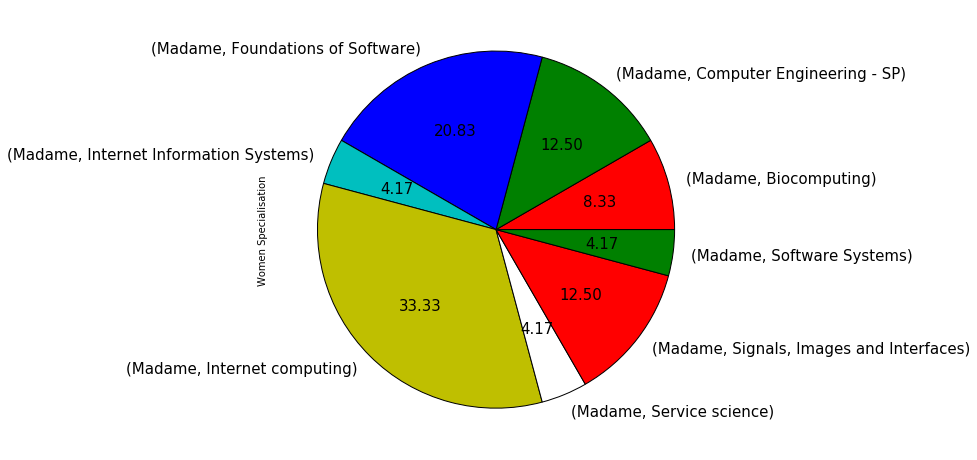

In [145]:
val = master_data_final.groupby(['sex','special']).apply(lambda x: len(x))
val.name = 'Female Specialisation'
print(val[['Madame']])
val[['Madame']].plot(kind = 'pie',figsize=(8, 8),autopct='%.2f',
                     
                     fontsize=15, colors=['r', 'g', 'b', 'c', 'y', 'w'])


sex       special                       
Monsieur  Biocomputing                       1
          Computer Engineering - SP         16
          Computer Science Theory            1
          Data Analytics                     4
          Foundations of Software           47
          Information Security - SP          7
          Internet computing                72
          Service science                    2
          Signals, Images and Interfaces    24
          Software Systems                  15
Name: Women Specialisation, dtype: int64


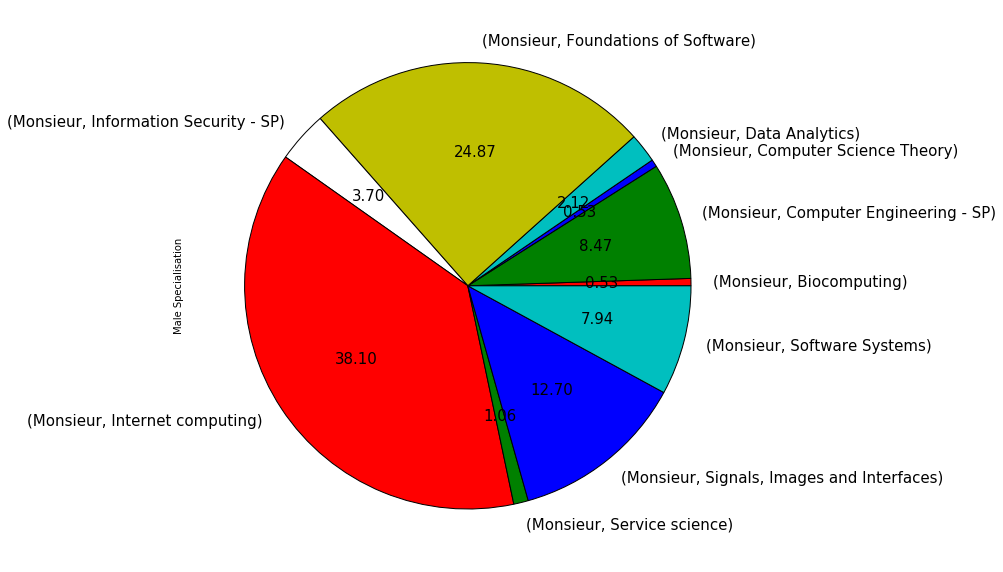

In [205]:
print(val[['Monsieur']])
val.name = 'Male Specialisation'

val[['Monsieur']].plot(kind = 'pie',figsize=(10, 10),autopct='%.2f',
                     
                     fontsize=15, colors=['r', 'g', 'b', 'c', 'y', 'w'])


In [152]:
with open('master_data','rb') as handle:
    master_data = pickle.load(handle)


,minor,sciper,semester,sex,specail,start_year
0,,153066,Master semestre 1,Monsieur,,2007-2008
1,,180027,Master semestre 1,Madame,,2007-2008
2,,152232,Master semestre 1,Monsieur,,2007-2008
3,,177395,Master semestre 1,Monsieur,,2007-2008
4,,161970,Master semestre 1,Monsieur,,2007-2008
5,,166258,Master semestre 1,Monsieur,,2007-2008
6,,173600,Master semestre 1,Monsieur,,2007-2008
7,,178879,Master semestre 1,Monsieur,,2007-2008
8,,154573,Master semestre 1,Madame,,2007-2008
9,,160492,Master semestre 1,Monsieur,,2007-2008


New Female Student each Year
start_year
2007-2008    10
2008-2009     6
2009-2010     4
2010-2011    13
2011-2012    19
2012-2013    15
2013-2014    15
2014-2015    12
2015-2016    16
dtype: int64
New Male Student each Year
start_year
2007-2008     61
2008-2009     54
2009-2010     48
2010-2011     83
2011-2012     83
2012-2013     73
2013-2014     89
2014-2015     92
2015-2016    116
dtype: int64


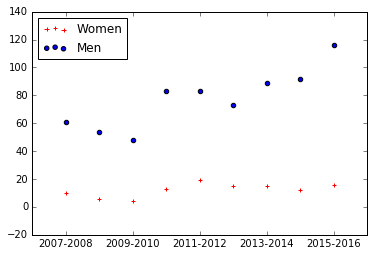

In [230]:
master_data.index = master_data['sciper']
tf=master_data.groupby(['semester','sex','start_year']).apply(lambda x: len(x))

fig, ax = plt.subplots()
fig.canvas.draw()

tg = tf.loc['Master semestre 1','Madame']
print('New Female Student each Year')
print(tg)
women = plt.scatter([ind for ind, val in enumerate(tg.index)],tg.values,c='r',marker='+',label='Women')
labels = [item.get_text() for item in ax.get_xticklabels()]


tg = tf.loc['Master semestre 1','Monsieur']
print('New Male Student each Year')
print(tg)
plt.scatter([ind for ind, val in enumerate(tg.index)],tg.values,c='b',marker='o',label='Men')
plt.xticks(list(range(0,len(tg.index),2)))
labels = tg.index.values[list(range(0,len(tg.index),2))]
ax.set_xticklabels(labels)

plt.legend(loc='upper left');